In [158]:
# Import the libraries 
import numpy as np
import pandas as pd
from pandas.plotting._misc import scatter_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
plt.rcParams['figure.figsize'] = 15, 12

In [363]:
# Import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from itertools import groupby
from matplotlib.gridspec import GridSpec
from pandas.plotting._misc import scatter_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 12

# Dataset

In [160]:
data=pd.read_csv('FB_conversion_data.csv')

In [161]:
data

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [162]:
data.describe()

ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [164]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [165]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

# Data Exploration

In [166]:
for i in data.columns:
    if data[i].nunique() < 10:
        print(f'The column "{i}" is __{data[i].dtype}__ \nhas __{data[i].nunique()}__ unique values: \n{data[i].value_counts()}')
        print(10*'==')
    else:
        print(f'The column "{i}" is __{data[i].dtype}__ \nhas __{data[i].nunique()}__ unique values')
        print(10*'==')

The column "ad_id" is __int64__ 
has __1143__ unique values
The column "xyz_campaign_id" is __int64__ 
has __3__ unique values: 
1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64
The column "fb_campaign_id" is __int64__ 
has __691__ unique values
The column "age" is __object__ 
has __4__ unique values: 
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
The column "gender" is __object__ 
has __2__ unique values: 
M    592
F    551
Name: gender, dtype: int64
The column "interest" is __int64__ 
has __40__ unique values
The column "Impressions" is __int64__ 
has __1130__ unique values
The column "Clicks" is __int64__ 
has __183__ unique values
The column "Spent" is __float64__ 
has __869__ unique values
The column "Total_Conversion" is __int64__ 
has __32__ unique values
The column "Approved_Conversion" is __int64__ 
has __16__ unique values


In [168]:
data.shape

(1143, 11)

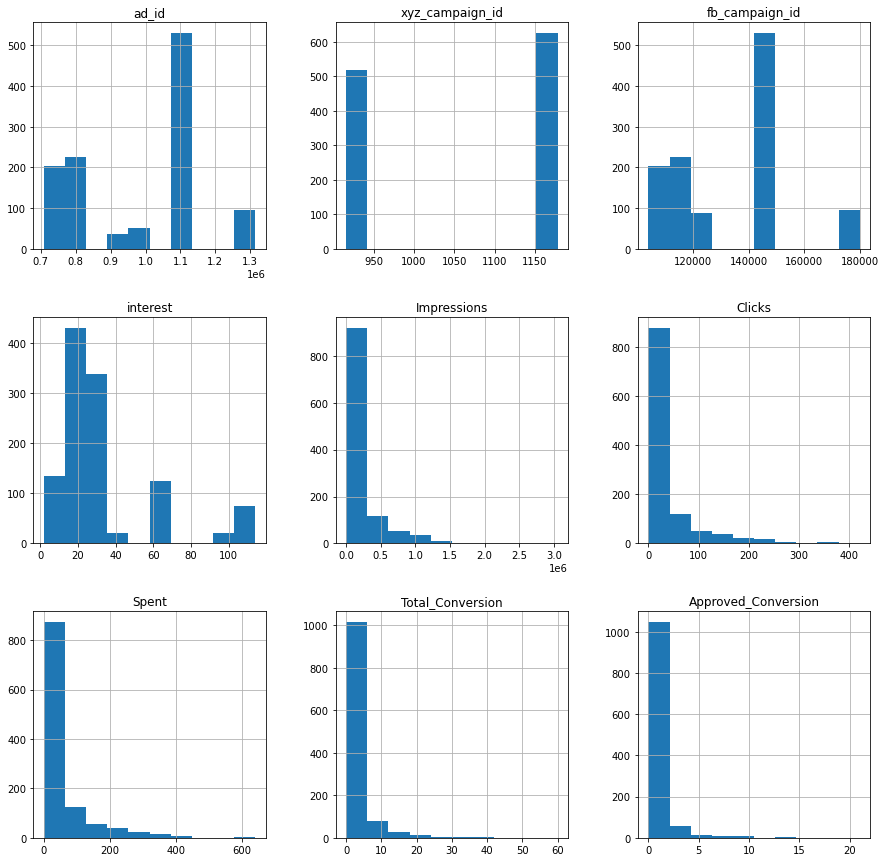

In [169]:
fig, ax = plt.subplots(figsize=(15, 15))
data.hist(ax=ax)
plt.show()

In [170]:
data.keys()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [171]:
print('Total ADS: {}'.format(data.shape[0]))
print('Number of ADS with 0 clicks: {}'.format(len(data.loc[data['Clicks'] == 0])))
print('Number of 0 paids to FACEBOOK for showing ADS: {}'.format(len(data.loc[data['Spent'] == 0])))
print('Number of ADS with 0 enquires about their product: {}'.format(len(data.loc[data['Total_Conversion'] == 0])))
print('Number of ADS with 0 buys: {}'.format(len(data.loc[data['Approved_Conversion'] == 0])))

Total ADS: 1143
Number of ADS with 0 clicks: 207
Number of 0 paids to FACEBOOK for showing ADS: 207
Number of ADS with 0 enquires about their product: 8
Number of ADS with 0 buys: 559


Finding the Correlation

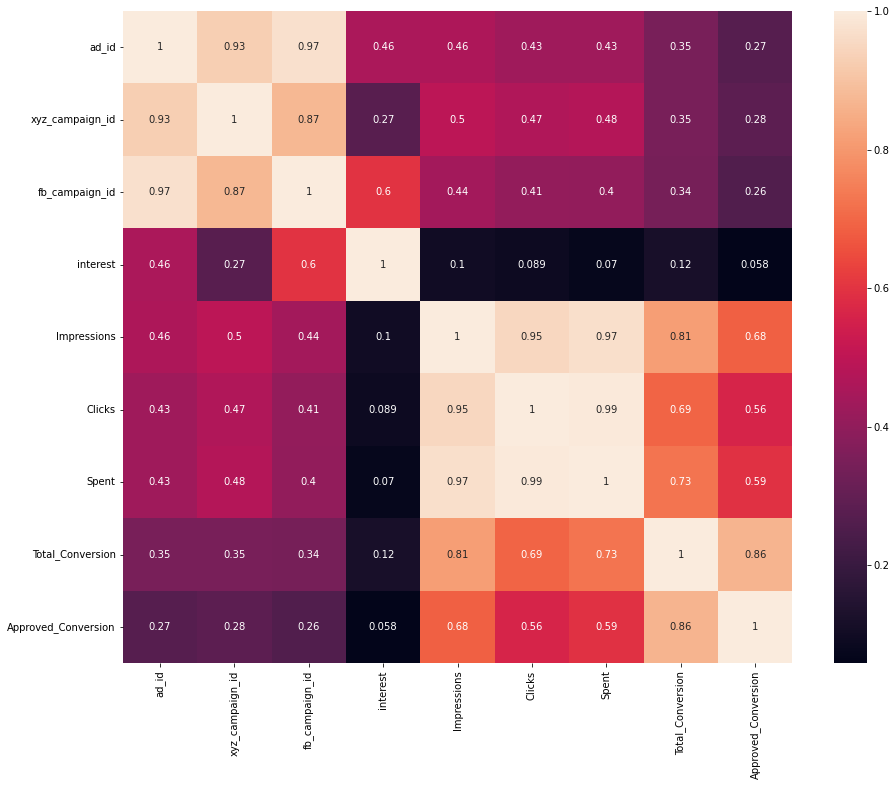

In [172]:
correlation_mat = data.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

### Separating 'Categorical' and 'Numerical' columns

a) Categorical

In [173]:
categorical_features=[ x for x in data.columns if data[x].dtype == 'O']
categorical_features

['age', 'gender']

There are only 2 categorical columns namely, age and gender.

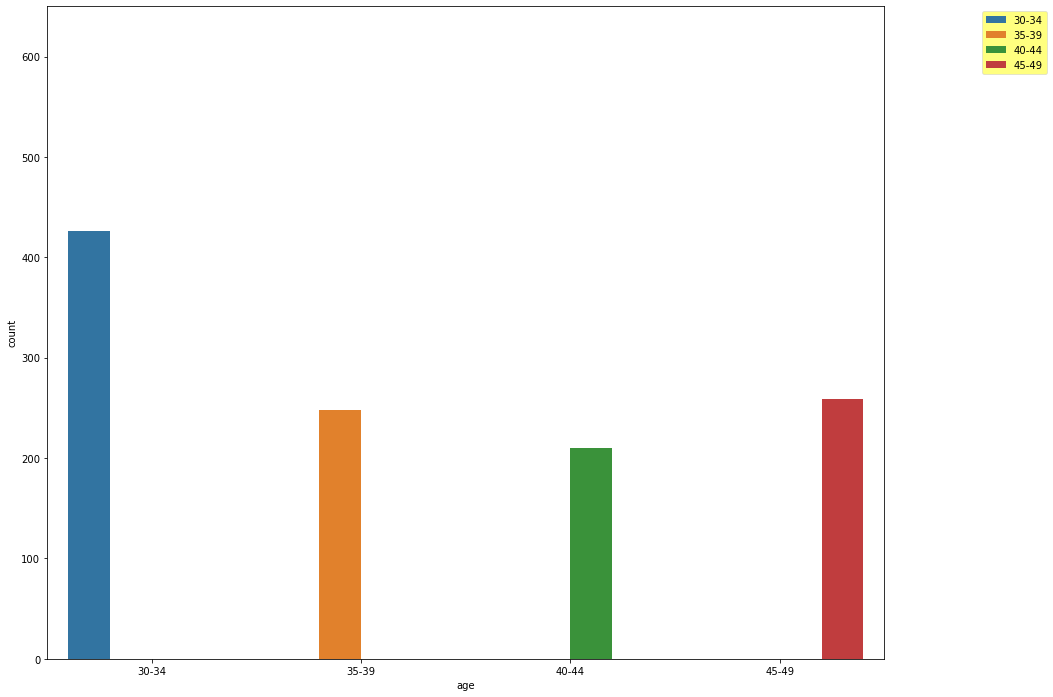

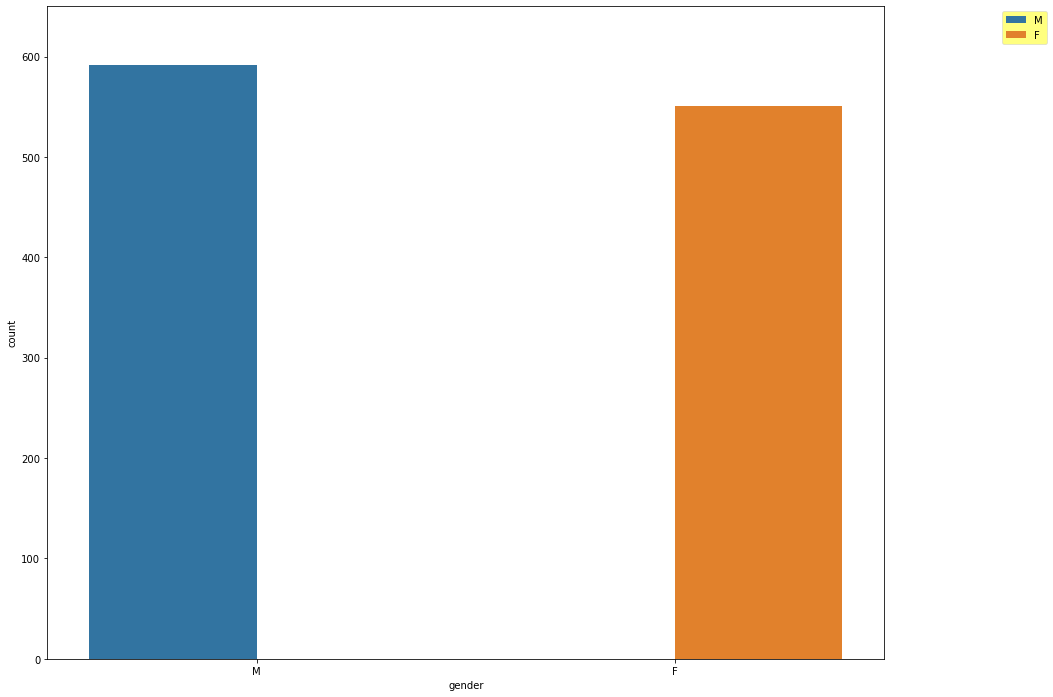

In [174]:

for i in categorical_features:
    sns.countplot(data[i], hue= data[i])
    plt.ylim(0,650)
    plt.legend(loc='upper right', facecolor='yellow', framealpha=0.5, bbox_to_anchor=(1.2,1))
    plt.show()

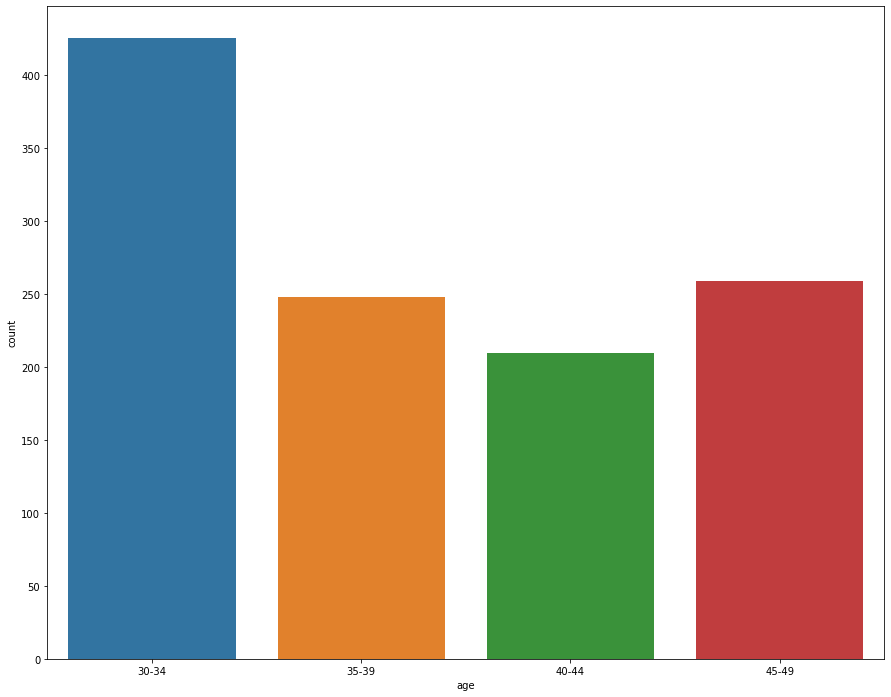

In [175]:
sns.countplot(x ='age', data = data) 
plt.show() 

## Data Visualization 

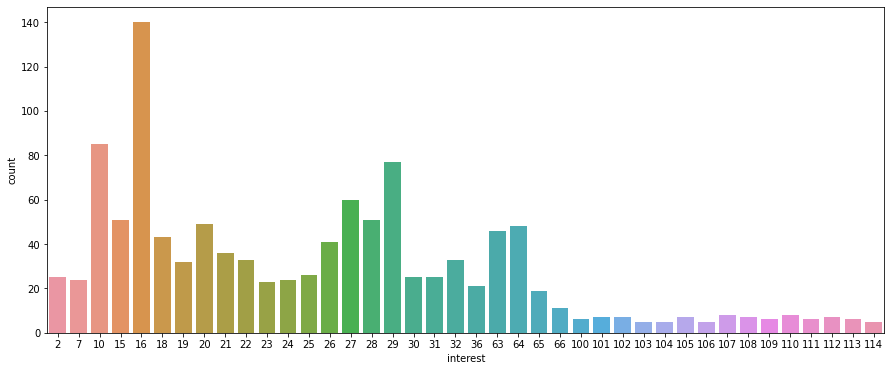

In [176]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x ='interest', data = data) 
plt.show() 

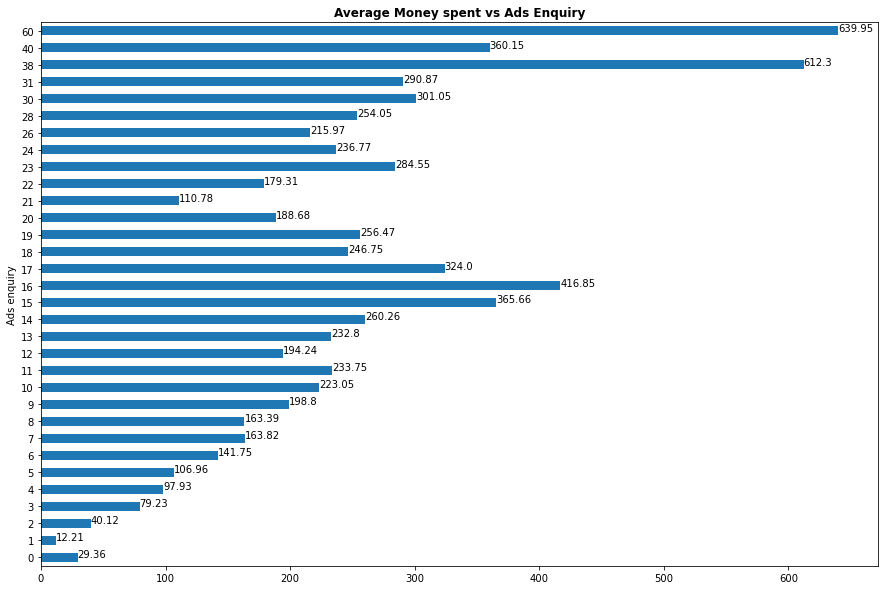

In [177]:
fig= plt.figure(figsize=(15,10))

data.groupby('Total_Conversion')['Spent'].mean().plot.barh()
plt.title('Average Money spent vs Ads Enquiry', fontweight="bold")
plt.ylabel('Ads enquiry')

abc= round(data.groupby('Total_Conversion')['Spent'].mean(),2)

for index, value in enumerate(abc):
    plt.text(value, index, str(value)) 

Insights from above graph: When the company spent an average of

1) $10-200 on Ads, then, they got 120 Ads enquiry in return.

2) $200-400 on Ads, then, they got 319 Ads enquiry in return.

3) > $400 on Ads, then, they got 114 Ads enquiry in return.

We can conclude that spending between $200-400 on Ads seems reasonable for any company because it yields the max Ads enquiry.

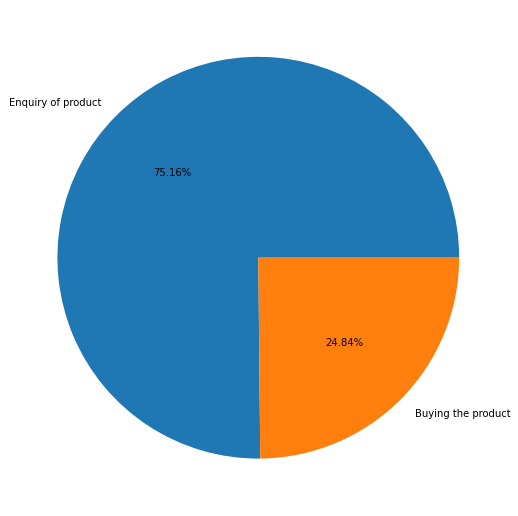

In [178]:
fig= plt.figure(figsize=(9,10))

value=[data['Total_Conversion'].mean(), data['Approved_Conversion'].mean()]
labels= ['Enquiry of product', 'Buying the product']
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

Around 3/4th of the people only enquires about the products seen via ads but only 1/4th people buys it.

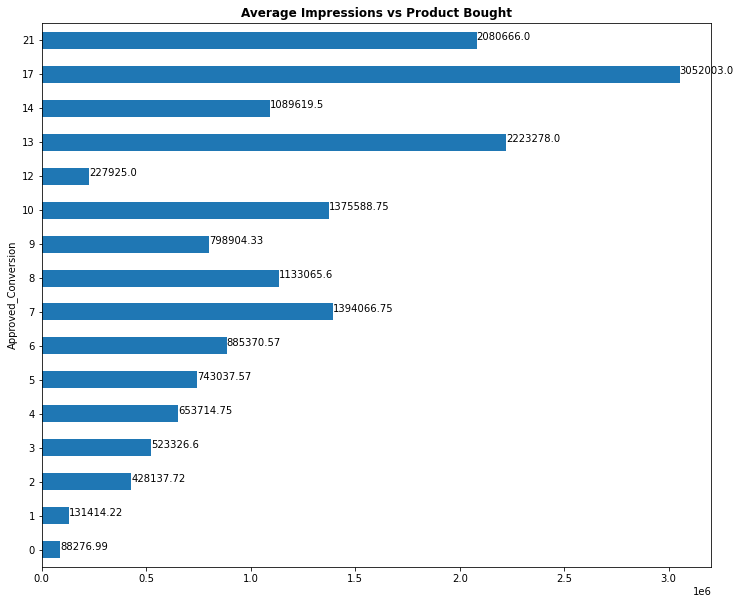

In [179]:
fig= plt.figure(figsize=(12,10))

data.groupby(['Approved_Conversion'])['Impressions'].mean().plot.barh()
xyz=round(data.groupby(['Approved_Conversion'])['Impressions'].mean(),2)
plt.title('Average Impressions vs Product Bought', fontweight="bold")

#to put the value above the bar
for index, value in enumerate(xyz):
    plt.text(value, index, str(value))

Insights:

When the ads were shown more than 1300000 times, a total of 68 products were bought by the people, 64 products were sold when the Impressions were less than 1300000.
i.e. More impression implies more publicity and thus more people will buy it.

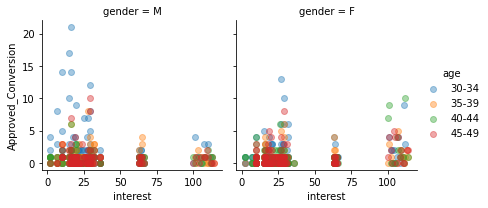

In [180]:
g = sns.FacetGrid(data, col="gender",hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

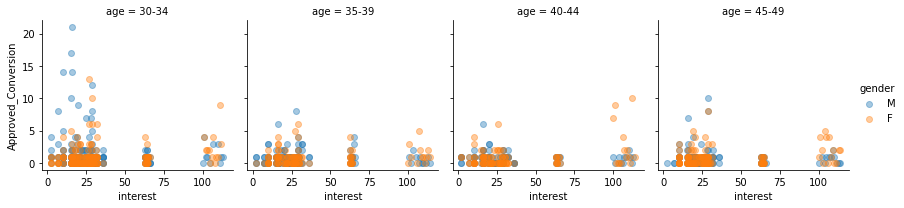

In [181]:
g = sns.FacetGrid(data, col="age",hue = 'gender')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

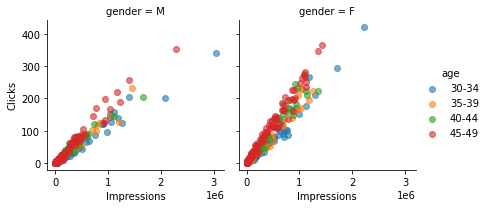

In [182]:
g = sns.FacetGrid(data,col = 'gender',hue = 'age')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.6)
g.add_legend()

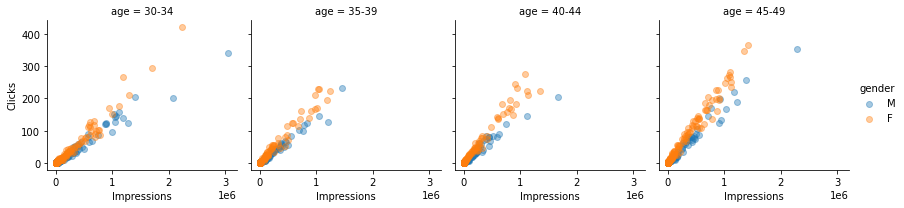

In [183]:
g = sns.FacetGrid(data,col = 'age',hue = 'gender')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()

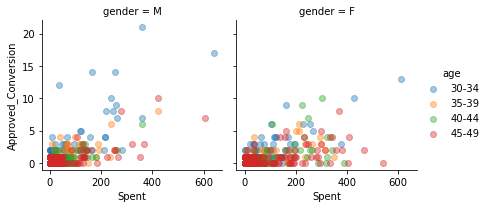

In [184]:
g = sns.FacetGrid(data, col="gender",hue= 'age')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

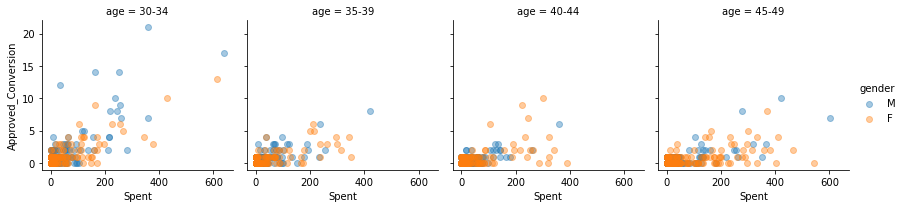

In [185]:
g = sns.FacetGrid(data, col="age",hue = 'gender')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

b) Numerical

In [186]:
numerical_features = [x for x in data.columns if x not in categorical_features]
numerical_features

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

In [187]:
#removig the 'id' columns from the dataset
numerical_features_new = [x for x in numerical_features if 'ad_id' not in x]
numerical_features_new

['xyz_campaign_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

In [188]:
from pandas_profiling import ProfileReport
plt.ion()
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Giving numerical value to the categorical values by using LabelEncoder

In [189]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for x in categorical_features:
    data[x]= le.fit_transform(data[x])
    print(x, le.classes_)

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


In [190]:

women= data[data['gender']==0]
men= data[data['gender']==1]

men_abv_avg_Impression = men[men['Impressions']>data['Impressions'].mean()]
women_abv_avg_Impression = women[women['Impressions']>data['Impressions'].mean()]

men_below_avg_Impression = men[men['Impressions']<data['Impressions'].mean()]
women_below_avg_Impression = women[women['Impressions']<data['Impressions'].mean()]

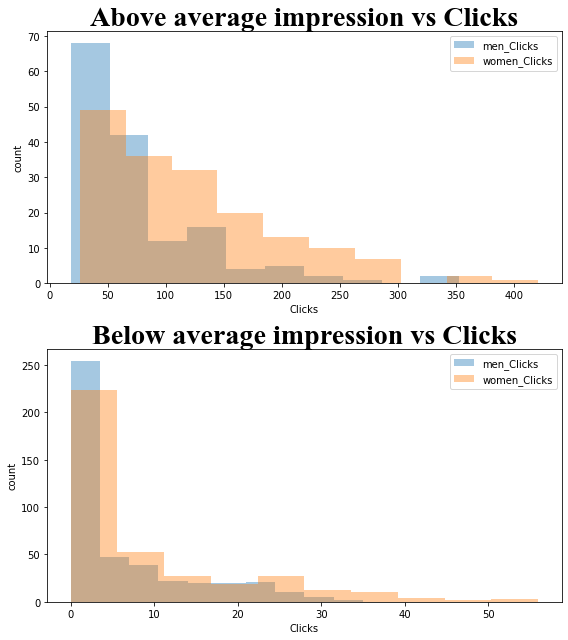

In [191]:
vg_Impression = women[women['Impressions']<data['Impressions'].mean()]
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,9))

sns.distplot(men_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'men_Clicks', ax= ax1)
sns.distplot(women_abv_avg_Impression.Clicks, bins=10, kde= False, label= 'women_Clicks', ax= ax1)
ax1.legend()
ax1.set_ylabel('count')
ax1.set_title('Above average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)

sns.distplot(men_below_avg_Impression.Clicks, bins=10, kde= False, label= 'men_Clicks', ax= ax2)
sns.distplot(women_below_avg_Impression.Clicks, bins=10, kde= False, label= 'women_Clicks', ax= ax2)
ax2.set_ylabel('count')
ax2.set_title('Below average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)
ax2.legend()

plt.tight_layout()
plt.show()

When women were shown ads more than the above average amount, they tend to click on it more often than men, who were shown the same amount of ads.

When women were shown ads less than the above average amount, then number of clicks fell drastically for both men and women, but women still clicked more than men did.

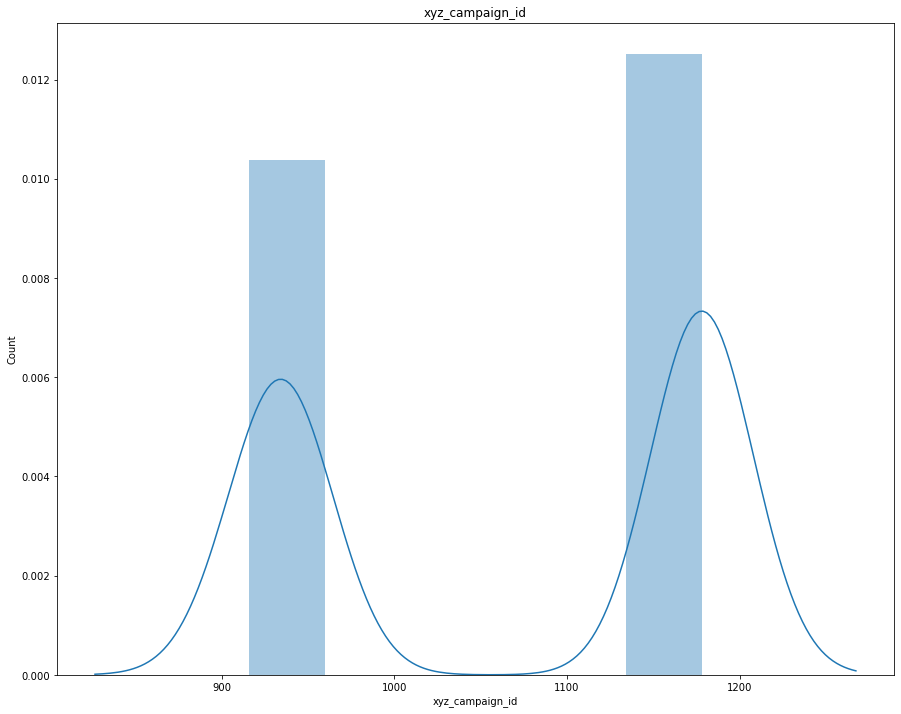

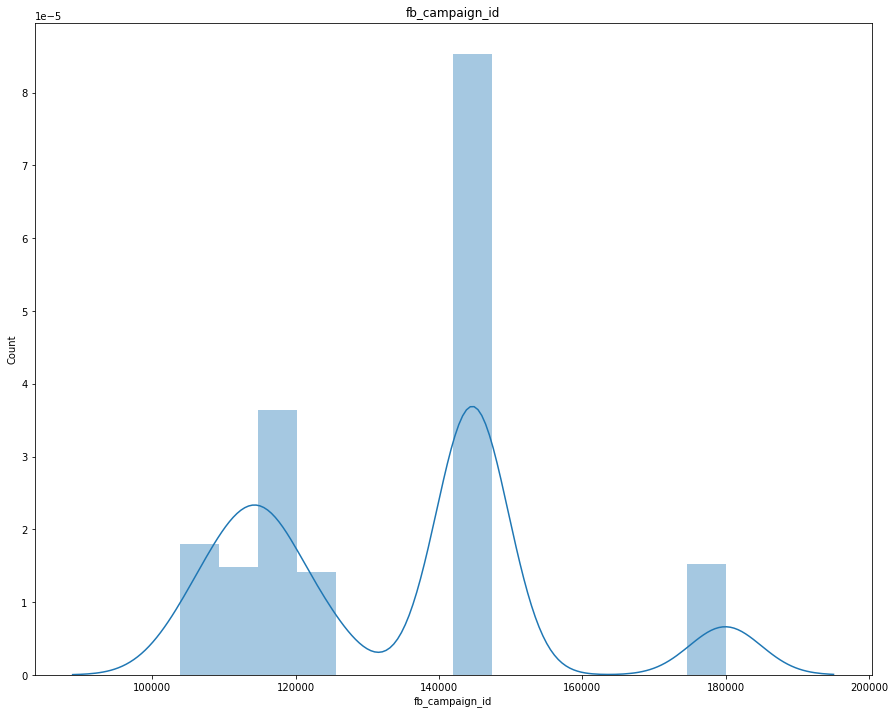

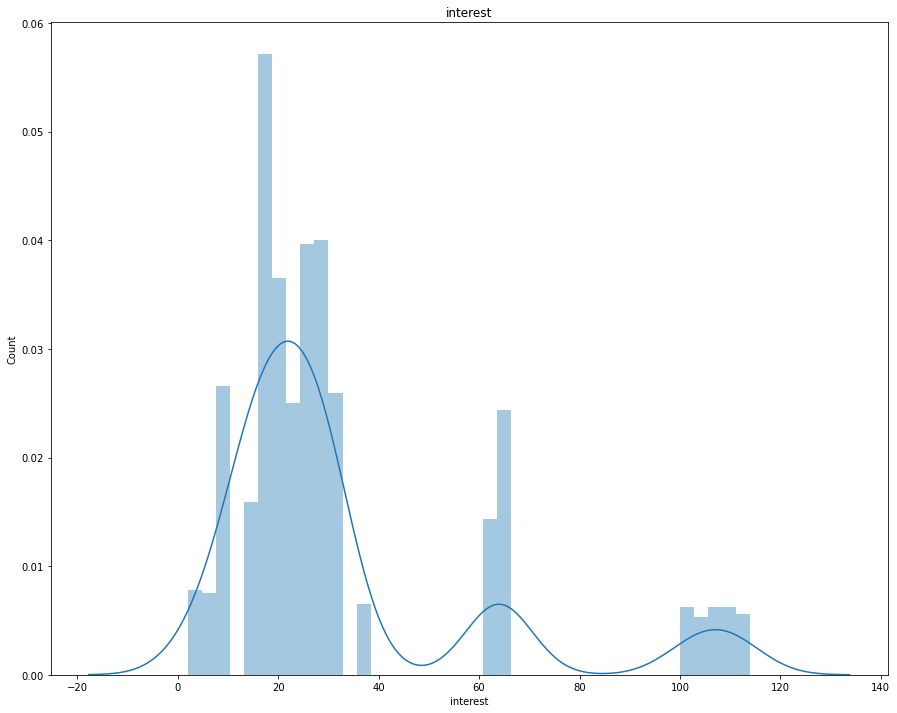

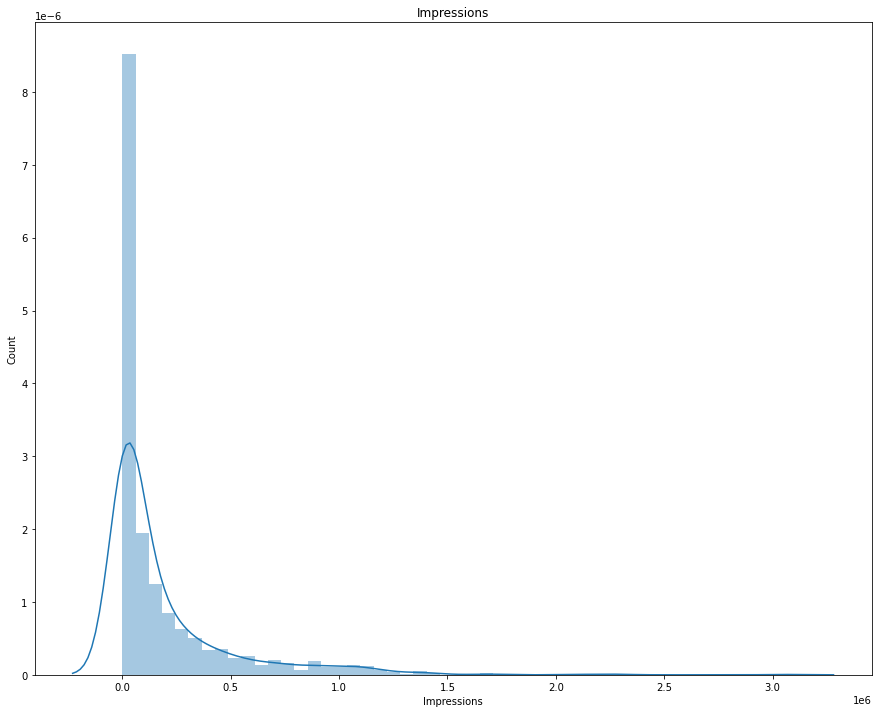

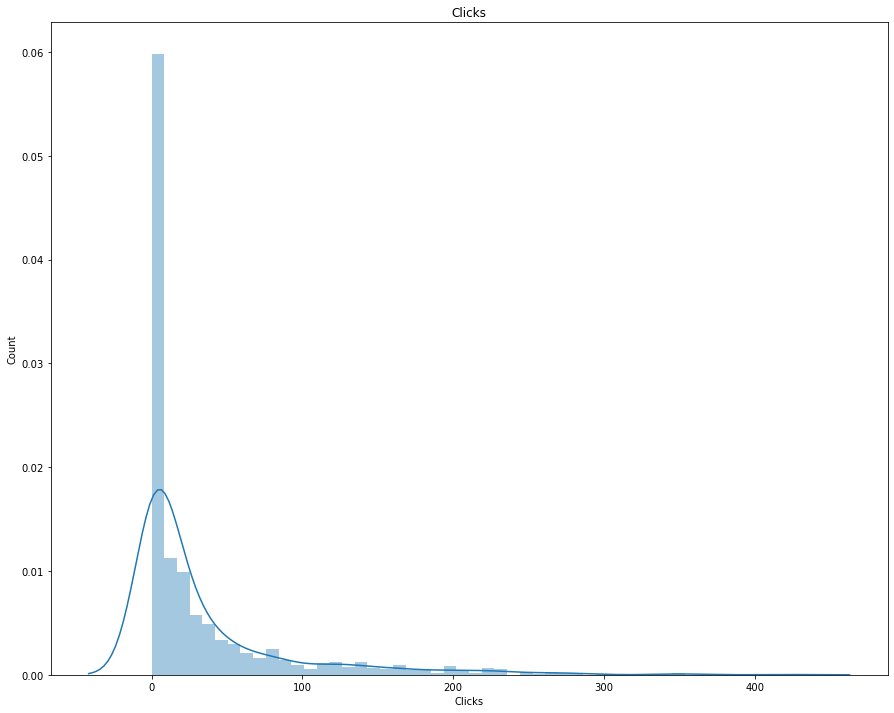

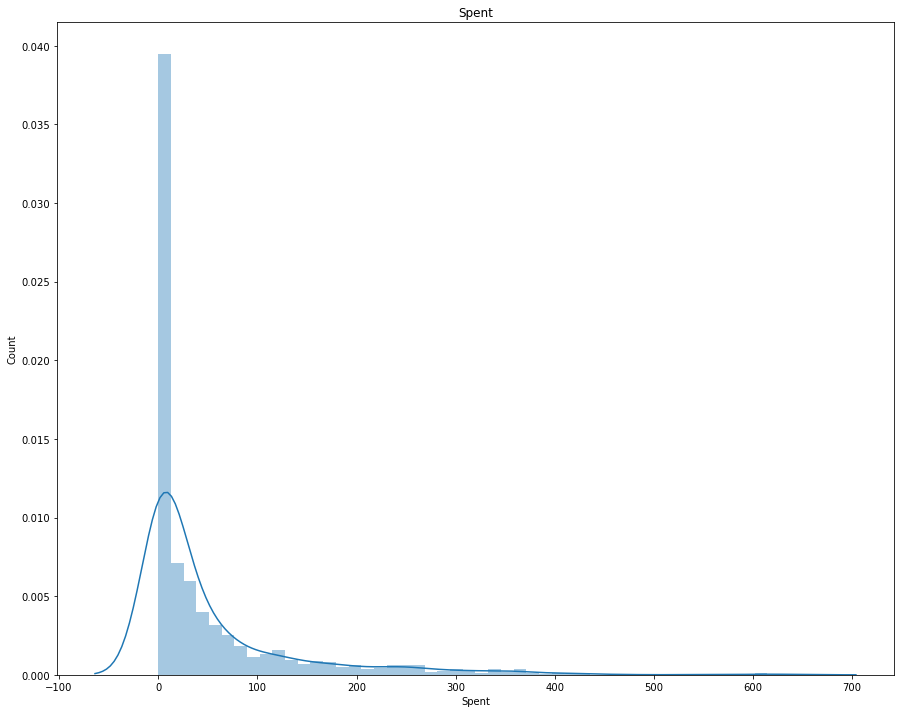

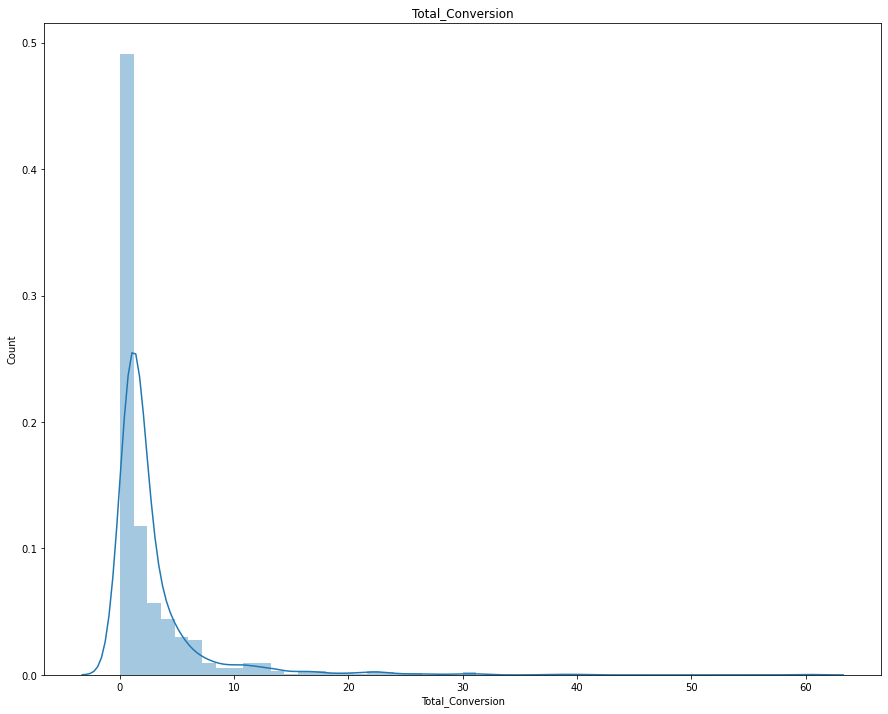

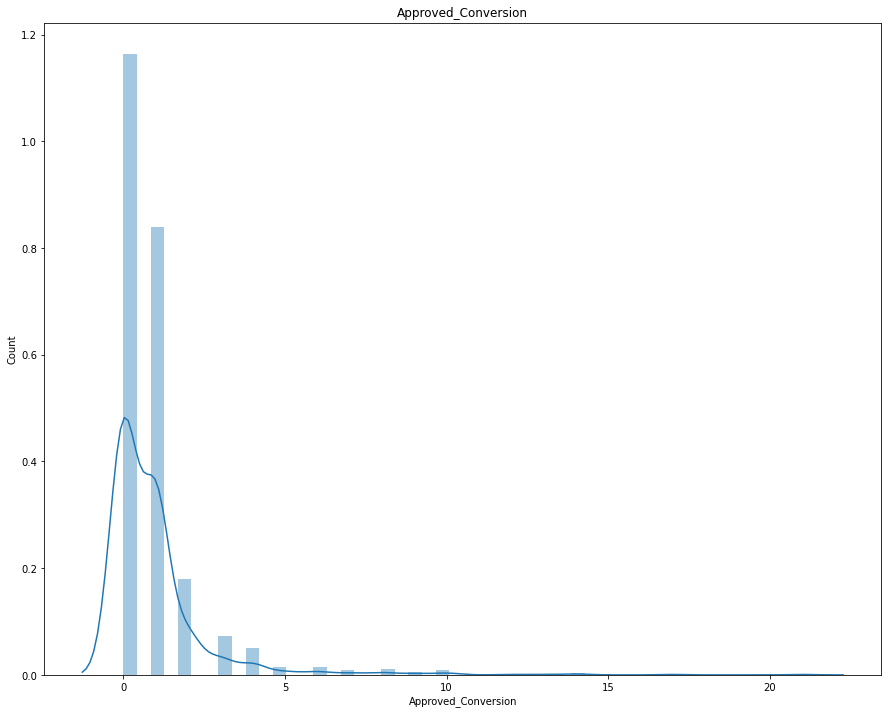

In [192]:
for i in numerical_features_new:
    sns.distplot(data[i])
    plt.title(i)
    plt.ylabel('Count')
    plt.show()

Bringing down all the values to same scale(between 0 to 1)

In [195]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
data_scaled = pd.DataFrame(scale.fit_transform(data) ,columns = data.columns)
data_scaled

ad_id  xyz_campaign_id  fb_campaign_id       age    gender  interest  \
0    -1.436327        -1.245164       -1.457591 -1.071137  0.964750 -0.659472   
1    -1.436311        -1.245164       -1.457542 -1.071137  0.964750 -0.622353   
2    -1.436198        -1.245164       -1.457396 -1.071137  0.964750 -0.473877   
3    -1.435971        -1.245164       -1.457005 -1.071137  0.964750 -0.176924   
4    -1.435955        -1.245164       -1.457005 -1.071137  0.964750 -0.176924   
...        ...              ...             ...       ...       ...       ...   
1138  1.687135         0.909863        2.254270  1.470682 -1.036538  2.829719   
1139  1.687140         0.909863        2.254319  1.470682 -1.036538  2.866838   
1140  1.687145         0.909863        2.254368  1.470682 -1.036538  2.903957   
1141  1.687156         0.909863        2.254465  1.470682 -1.036538  2.978196   
1142  1.687161         0.909863        2.254514  1.470682 -1.036538  3.015315   

      Impressions    Clicks     Spent  Total_Conversion  Approved_Conversion  
0       -0.573793 -0.569573 -0.574772         -0.190922             0.032236  
1       -0.540171 -0.551988 -0.570282         -0.190922            -0.543486  
2       -0.595087 -0.587157 -0.591233         -0.414055            -0.543486  
3       -0.583680 -0.569573 -0.576844         -0.414055            -0.543486  
4       -0.584083 -0.569573 -0.576383         -0.414055             0.032236  
...           ...       ...       ...               ...                  ...  
1138     3.016521  3.844193  3.532036          2.263541             0.607959  
1139     1.442036  1.523009  1.410369          0.032211            -0.543486  
1140    -0.112598 -0.094785 -0.127439         -0.190922            -0.543486  
1141     1.930492  1.786780  1.696198          1.147876             0.607959  
1142     1.044154  1.417501  1.315170          0.478477             0.607959  

[1143 rows x 11 columns]

In [196]:
# Features variance 
data.var()

ad_id                  3.763321e+10
xyz_campaign_id        1.479371e+04
fb_campaign_id         4.202627e+08
age                    1.394226e+00
gender                 2.498970e-01
interest               7.264174e+02
Impressions            9.782018e+10
Clicks                 3.236750e+03
Spent                  7.553073e+03
Total_Conversion       2.010261e+01
Approved_Conversion    3.019629e+00
dtype: float64

<AxesSubplot:>

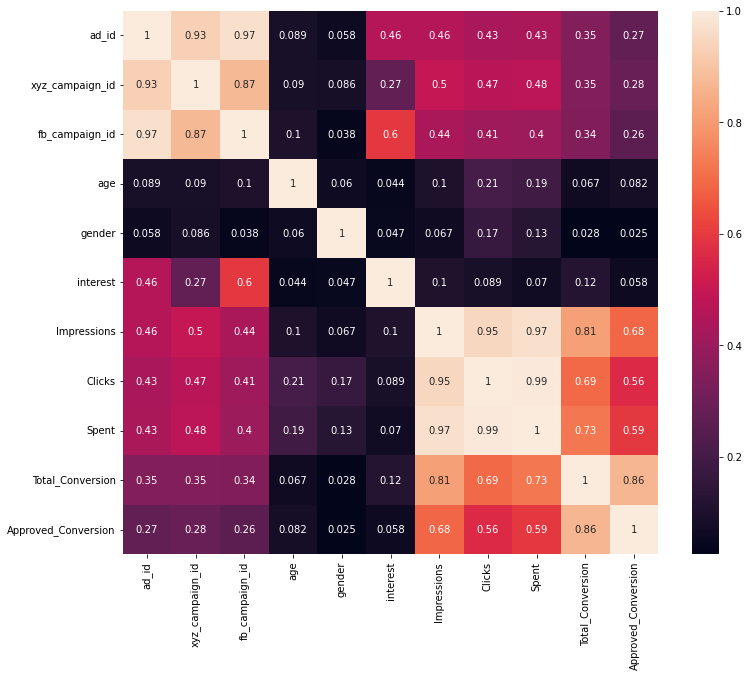

In [197]:
fig= plt.figure(figsize=(12,10))

sns.heatmap(data_scaled.corr().abs() , annot= True)

Keeping only the related columns

In [199]:
datak= data_scaled.copy()
datak= data[['Impressions', 'Clicks', 'Spent']]

## Applying algorithm (kmeans)

In [205]:
inertia= []
k= np.arange(1,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    ab = model.fit(datak.values)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))

In [206]:
inertias= pd.concat(inertia, axis=1).T.set_index('k')
inertias

inertia
k                
1.0  1.117107e+14
2.0  3.371168e+13
3.0  1.816477e+13
4.0  1.068436e+13
5.0  6.663860e+12
6.0  4.592166e+12
7.0  3.393458e+12
8.0  2.605713e+12

Lesser the inertia better the result.
But, we can see the drop in inertia from k=1 to k=2 and k=2 to k=3 is much greater.
Though, inertia decreases with increase in k, but the rate is very low.

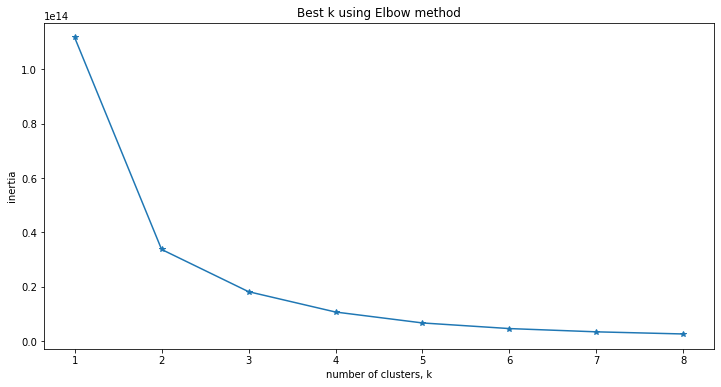

In [207]:
# Plot k vs inertias

plt.figure(figsize=(12,6))
plt.plot(inertias.index, inertias['inertia'], '-*')
plt.title('Best k using Elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

From the above elbow graph, we can see that for k=2, inertia drops with a high rate, so, we can choose k=2 or k=3 (to be on the safe side).

In [213]:
score=[]
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(data.values)
    sil_score= silhouette_score(data.values, pred)
    score.append(pd.Series({'k': i,
                            'Score': sil_score
                             }))

In [214]:
result= pd.concat(score, axis=1).T.set_index('k')
result

Score
k            
2.0  0.632809
3.0  0.642011
4.0  0.639452
5.0  0.640169
6.0  0.616716
7.0  0.621936
8.0  0.658659

From the above table, it is clear that k=2 i.e. , two yields the best result so we'll choose it.

In [215]:
model = KMeans(n_clusters= 2, max_iter=5)
model.fit(data.values)

KMeans(max_iter=5, n_clusters=2)

In [216]:
data['Score']= model.predict(data.values)
data.sample(5)

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
551  1121133             1178          144538    0       1        22   
444   950463              936          123504    3       1        15   
532  1121110             1178          144534    0       1        18   
41    710682              916          104239    0       0        27   
906  1121897             1178          144673    1       0        15   

     Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
551        25002       1    1.710000                 1                    0   
444          818       0    0.000000                 1                    0   
532       880814     123  210.360001                 6                    2   
41          1186       0    0.000000                 1                    0   
906        24664       2    2.630000                 1                    1   

     Score  
551      0  
444      0  
532      1  
41       0  
906      0

A Silhouette score of :
1) -1 shows BAD CLUSTERING

2) 0 shows CLUSTERS ARE OVERLAPPED

3) 1 or >1 shows GOOD CLUSTERING

## Visualisation of the result

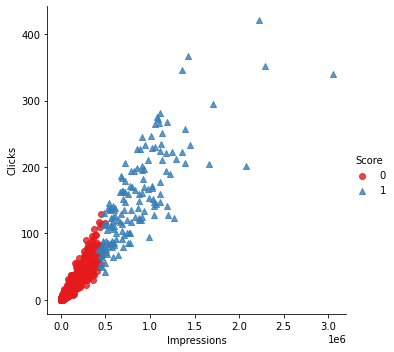

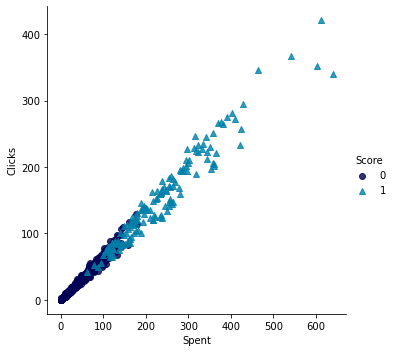

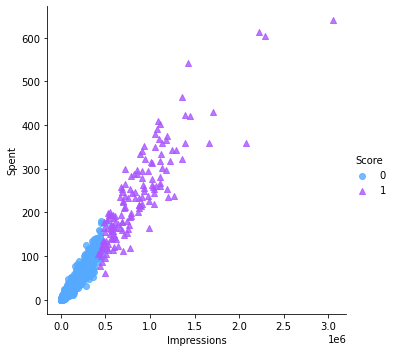

In [225]:
sns.lmplot(x='Impressions', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette='Set1')
sns.lmplot(x='Spent', y='Clicks', data= data, hue='Score',fit_reg=False, markers=["o", "^"], palette="ocean" )
sns.lmplot(x='Impressions', y='Spent', data= data, hue='Score',fit_reg=False, markers=["o", "^"] ,palette="cool" )
plt.show()

## Classification

In [374]:
data

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
0      708746              916          103916    0       1        15   
1      708749              916          103917    0       1        16   
2      708771              916          103920    0       1        20   
3      708815              916          103928    0       1        28   
4      708818              916          103928    0       1        28   
...       ...              ...             ...  ...     ...       ...   
1138  1314410             1178          179977    3       0       109   
1139  1314411             1178          179978    3       0       110   
1140  1314412             1178          179979    3       0       111   
1141  1314414             1178          179981    3       0       113   
1142  1314415             1178          179982    3       0       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350       1    1.430000                 2                    1   
1           17861       2    1.820000                 2                    0   
2             693       0    0.000000                 1                    0   
3            4259       1    1.250000                 1                    0   
4            4133       1    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773     252  358.189997                13                    2   
1139       637549     120  173.880003                 3                    0   
1140       151531      28   40.289999                 2                    0   
1141       790253     135  198.710001                 8                    2   
1142       513161     114  165.609999                 5                    2   

      Score  Max_Conversion  
0         0               0  
1         0               0  
2         0               1  
3         0               1  
4         0               1  
...     ...             ...  
1138      1               0  
1139      1               0  
1140      0               0  
1141      1               0  
1142      1               0  

[1143 rows x 13 columns]

Making a new Column - "Max_Conversion" derived from the Total Conversion column for the Classification problem where we are splitting the dataset into two parts and assigning binary values as 0 and 1 

In [375]:
data['Max_Conversion']=data['Total_Conversion']

In [376]:
data.loc[data['Max_Conversion']>1,'Max_Conversion']=0

In [377]:
data['Max_Conversion'].value_counts()

1    666
0    477
Name: Max_Conversion, dtype: int64

In [378]:
data.describe()

ad_id  xyz_campaign_id  fb_campaign_id          age  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501     1.264217   
std    1.939928e+05       121.629393    20500.308622     1.180774   
min    7.087460e+05       916.000000   103916.000000     0.000000   
25%    7.776325e+05       936.000000   115716.000000     0.000000   
50%    1.121185e+06      1178.000000   144549.000000     1.000000   
75%    1.121804e+06      1178.000000   144657.500000     2.000000   
max    1.314415e+06      1178.000000   179982.000000     3.000000   

            gender     interest   Impressions       Clicks        Spent  \
count  1143.000000  1143.000000  1.143000e+03  1143.000000  1143.000000   
mean      0.517935    32.766404  1.867321e+05    33.390201    51.360656   
std       0.499897    26.952131  3.127622e+05    56.892438    86.908418   
min       0.000000     2.000000  8.700000e+01     0.000000     0.000000   
25%       0.000000    16.000000  6.503500e+03     1.000000     1.480000   
50%       1.000000    25.000000  5.150900e+04     8.000000    12.370000   
75%       1.000000    31.000000  2.217690e+05    37.500000    60.025000   
max       1.000000   114.000000  3.052003e+06   421.000000   639.949998   

       Total_Conversion  Approved_Conversion        Score  Max_Conversion  
count       1143.000000          1143.000000  1143.000000     1143.000000  
mean           2.855643             0.944007     0.131234        0.582677  
std            4.483593             1.737708     0.337803        0.493333  
min            0.000000             0.000000     0.000000        0.000000  
25%            1.000000             0.000000     0.000000        0.000000  
50%            1.000000             1.000000     0.000000        1.000000  
75%            3.000000             1.000000     0.000000        1.000000  
max           60.000000            21.000000     1.000000        1.000000

Dropping the similar columns and making "Max_Conversion" as the target variable.

In [379]:
x=np.array(data.drop(labels=["Approved_Conversion","Total_Conversion",'Score','Max_Conversion'], axis=1))
y=np.array(data["Max_Conversion"])

In [380]:
data

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
0      708746              916          103916    0       1        15   
1      708749              916          103917    0       1        16   
2      708771              916          103920    0       1        20   
3      708815              916          103928    0       1        28   
4      708818              916          103928    0       1        28   
...       ...              ...             ...  ...     ...       ...   
1138  1314410             1178          179977    3       0       109   
1139  1314411             1178          179978    3       0       110   
1140  1314412             1178          179979    3       0       111   
1141  1314414             1178          179981    3       0       113   
1142  1314415             1178          179982    3       0       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350       1    1.430000                 2                    1   
1           17861       2    1.820000                 2                    0   
2             693       0    0.000000                 1                    0   
3            4259       1    1.250000                 1                    0   
4            4133       1    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773     252  358.189997                13                    2   
1139       637549     120  173.880003                 3                    0   
1140       151531      28   40.289999                 2                    0   
1141       790253     135  198.710001                 8                    2   
1142       513161     114  165.609999                 5                    2   

      Score  Max_Conversion  
0         0               0  
1         0               0  
2         0               1  
3         0               1  
4         0               1  
...     ...             ...  
1138      1               0  
1139      1               0  
1140      0               0  
1141      1               0  
1142      1               0  

[1143 rows x 13 columns]

Splitting up the dataset into train and test datset into 80 % and 20 %.

In [381]:

X_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)

## Logistic Regression

In [382]:
logistic_model  = LogisticRegression()

In [383]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [384]:
pred = logistic_model.predict(x_val)

In [385]:
from sklearn.metrics import classification_report , confusion_matrix

In [386]:


def print_score(clf, X_train, y_train, x_val, y_val, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_val)
        clf_report = pd.DataFrame(classification_report(y_val, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

In [387]:

print_score(logistic_model , X_train, y_train, x_val, y_val, train=True)
print_score(logistic_model , X_train, y_train, x_val, y_val, train=False)

Train Result:
Accuracy Score: 83.37%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.861862    0.817556  0.833698    0.839709      0.836607
recall       0.730280    0.911708  0.833698    0.820994      0.833698
f1-score     0.790634    0.862069  0.833698    0.826351      0.831353
support    393.000000  521.000000  0.833698  914.000000    914.000000
_______________________________________________
Confusion Matrix: 
 [[287 106]
 [ 46 475]]

Test Result:
Accuracy Score: 80.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.803030    0.809816   0.80786    0.806423      0.807327
recall      0.630952    0.910345   0.80786    0.770649      0.807860
f1-score    0.706667    0.857143   0.80786    0.781905      0.801946
support    84.000000  145.000000   0.80786  229.000000    229.00000

In [388]:

print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        84
           1       0.81      0.91      0.86       145

    accuracy                           0.81       229
   macro avg       0.81      0.77      0.78       229
weighted avg       0.81      0.81      0.80       229

[[ 53  31]
 [ 13 132]]


Viewing confusion-matrix
Print the Confusion Matrix and slice it into four pieces

In [389]:

cm = confusion_matrix(y_val, pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 53  31]
 [ 13 132]]

True Positives(TP) =  53

True Negatives(TN) =  132

False Positives(FP) =  31

False Negatives(FN) =  13


## Random Forest Classifier

In [390]:
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [391]:
Y_pred = rf_clf.predict(x_val)

In [392]:

print(classification_report(y_val, Y_pred))
print(confusion_matrix(y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        84
           1       0.83      0.85      0.84       145

    accuracy                           0.79       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.79      0.79      0.79       229

[[ 59  25]
 [ 22 123]]


In [393]:

print_score(rf_clf , X_train, y_train, x_val, y_val, train=True)
print_score(rf_clf , X_train, y_train, x_val, y_val, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    393.0  521.0       1.0      914.0         914.0
_______________________________________________
Confusion Matrix: 
 [[393   0]
 [  0 521]]

Test Result:
Accuracy Score: 79.48%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.728395    0.831081   0.79476    0.779738      0.793415
recall      0.702381    0.848276   0.79476    0.775328      0.794760
f1-score    0.715152    0.839590   0.79476    0.777371      0.793945
support    84.000000  145.000000   0.79476  229.000000    229.000000
_______________________________________________
Conf

Viewing confusion-matrix for Random Forest Classifer and printing the Confusion Matrix and slice it into four pieces

In [394]:

cm = confusion_matrix(y_val, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 59  25]
 [ 22 123]]

True Positives(TP) =  59

True Negatives(TN) =  123

False Positives(FP) =  25

False Negatives(FN) =  22


## Decision Tree Classifier

In [395]:
dtclf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
dtclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [396]:
y_pred_dt = dtclf.predict(x_val)

In [397]:
print(classification_report(y_val, y_pred_dt))
print(confusion_matrix(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        84
           1       0.84      0.89      0.86       145

    accuracy                           0.82       229
   macro avg       0.81      0.80      0.80       229
weighted avg       0.82      0.82      0.82       229

[[ 59  25]
 [ 16 129]]


In [398]:
print_score(dtclf , X_train, y_train, x_val, y_val, train=True)
print_score(dtclf, X_train, y_train, x_val, y_val, train=False)

Train Result:
Accuracy Score: 84.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.847887    0.835420  0.840263    0.841654      0.840781
recall       0.765903    0.896353  0.840263    0.831128      0.840263
f1-score     0.804813    0.864815  0.840263    0.834814      0.839015
support    393.000000  521.000000  0.840263  914.000000    914.000000
_______________________________________________
Confusion Matrix: 
 [[301  92]
 [ 54 467]]

Test Result:
Accuracy Score: 82.10%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.786667    0.837662  0.820961    0.812165      0.818957
recall      0.702381    0.889655  0.820961    0.796018      0.820961
f1-score    0.742138    0.862876  0.820961    0.802507      0.818588
support    84.000000  145.000000  0.820961  229.000000    229.00000

Viewing confusion-matrix for Decision Tree Classifier and printing the Confusion Matrix and slice it into four pieces

In [399]:
cm = confusion_matrix(y_val, y_pred_dt)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 59  25]
 [ 16 129]]

True Positives(TP) =  59

True Negatives(TN) =  129

False Positives(FP) =  25

False Negatives(FN) =  16


## XGBoost

Optuna- Hyperparameter Tuning

Parameters

In [400]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [401]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
dtrainxgb = xgb.DMatrix(X_train,y_train)
dtestxgb  = xgb.DMatrix(x_val,y_val)
import re


In [402]:
# def objective2(trial):
#     params = {
#         "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
#         "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
#         "eta": trial.suggest_loguniform("eta",1e-2,0.1),
#         "gamma": trial.suggest_loguniform("gamma",0.05,1),
#         "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
#         "min_child_weight": trial.suggest_int("min_child_weight",5,11),
#         "random_state": 2021
#     }
#     return(return_rmse2(params))




In [403]:
# def return_rmse2(params):
#     xgbmod = XGBClassifier();
#     modelxgb1 = xgb.train(params , dtrainxgb, num_boost_round = 20, evals = [(dtestxgb, 'eval')],
#           early_stopping_rounds=20,verbose_eval = 0)
#     resultxgb1 = modelxgb1.eval(dtestxgb)
#     resultxgb1 = np.float(re.search(r'[\d.]+$',result).group(0))
#     print(resultxgb1)
#     return(resultxgb1)



In [404]:

# study2 = optuna.create_study(direction='minimize',sampler=TPESampler())
# study2.optimize(objective2, n_trials= 1000,show_progress_bar = True)
# fit model no training data
# modelXGB = XGBClassifier(**study2)
modelXGB = XGBClassifier(n_estimators=200,subsample= 0.8,colsample_bytree= 0.6,eta=0.01,gamma=0.01,max_depth=3,min_child_weight=0.1,random_state=42,eval_metric='mlogloss')
# 82.53% modelXGB = XGBClassifier(n_estimators=200,subsample= 0.8,colsample_bytree= 0.6,eta=0.01,gamma=0.01,max_depth=3,min_child_weight=0.1,random_state=42)
# 82.10% modelXGB = XGBClassifier(n_estimators=100,subsample= 0.7,colsample_bytree= 0.6,eta=0.01,gamma=0.01,max_depth=3,min_child_weight=0.1,random_state=42)
# 81.66 modelXGB = XGBClassifier(n_estimators=100,subsample= 0.7,colsample_bytree= 0.6,eta=0.01,gamma=0.01,max_depth=5,min_child_weight=0.1,random_state=2021)
# modelXGB = XGBClassifier(n_estimators=1000,subsample= 0.9,colsample_bytree= 0.4, objective='binary:logistic', eta=0.02,gamma=0.88,max_depth=5,min_child_weight=5,random_state=2021)
print(modelXGB)
modelXGB.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='mlogloss',
              gamma=0.01, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=3, min_child_weight=0.1,
              missing=nan, monotone_constraints=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='mlogloss',
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.00999999978,
              max_delta_step=0, max_depth=3, min_child_weight=0.1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [405]:
y_predxgb = modelXGB.predict(x_val)
print(classification_report(y_val,y_predxgb))
predictionsxgb = [round(value) for value in y_predxgb]
accuracy = accuracy_score(y_val, predictionsxgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        84
           1       0.85      0.88      0.86       145

    accuracy                           0.83       229
   macro avg       0.81      0.80      0.81       229
weighted avg       0.82      0.83      0.82       229

Accuracy: 82.53%


In [406]:
print_score(modelXGB , X_train, y_train, x_val, y_val, train=True)
print_score(modelXGB, X_train, y_train, x_val, y_val, train=False)

Train Result:
Accuracy Score: 85.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863510    0.850450   0.85558    0.856980      0.856066
recall       0.788804    0.905950   0.85558    0.847377      0.855580
f1-score     0.824468    0.877323   0.85558    0.850896      0.854597
support    393.000000  521.000000   0.85558  914.000000    914.000000
_______________________________________________
Confusion Matrix: 
 [[310  83]
 [ 49 472]]

Test Result:
Accuracy Score: 82.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.782051    0.847682  0.825328    0.814867      0.823608
recall      0.726190    0.882759  0.825328    0.804475      0.825328
f1-score    0.753086    0.864865  0.825328    0.808976      0.823863
support    84.000000  145.000000  0.825328  229.000000    229.00000

Viewing confusion-matrix for XGBoost and printing the Confusion Matrix and slice it into four pieces

In [407]:
cm = confusion_matrix(y_val, y_predxgb )
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 61  23]
 [ 17 128]]

True Positives(TP) =  61

True Negatives(TN) =  128

False Positives(FP) =  23

False Negatives(FN) =  17


## Lightgbm

In [408]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [409]:
# predict the results
y_predlgbm=lgbm.predict(x_val)

In [410]:
print(classification_report(y_val, y_predlgbm))
print(confusion_matrix(y_val, y_predlgbm))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        84
           1       0.81      0.83      0.82       145

    accuracy                           0.77       229
   macro avg       0.76      0.75      0.75       229
weighted avg       0.77      0.77      0.77       229

[[ 56  28]
 [ 24 121]]


In [411]:
print_score(lgbm , X_train, y_train, x_val, y_val, train=True)
print_score(lgbm, X_train, y_train, x_val, y_val, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    393.0  521.0       1.0      914.0         914.0
_______________________________________________
Confusion Matrix: 
 [[393   0]
 [  0 521]]

Test Result:
Accuracy Score: 77.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.700000    0.812081  0.772926    0.756040      0.770968
recall      0.666667    0.834483  0.772926    0.750575      0.772926
f1-score    0.682927    0.823129  0.772926    0.753028      0.771701
support    84.000000  145.000000  0.772926  229.000000    229.000000
_______________________________________________
Conf

Viewing confusion-matrix for LGBM and printing the Confusion Matrix and slice it into four pieces

In [412]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_predlgbm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 56  28]
 [ 24 121]]

True Positives(TP) =  56

True Negatives(TN) =  121

False Positives(FP) =  28

False Negatives(FN) =  24


In [413]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predx, y_val)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_val, y_predx)))

LightGBM Model accuracy score: 0.7729


Forming the combined results from all the models used for classification

In [414]:
Algorithms =[logistic_model,dtclf,lgbm,rf_clf,modelXGB]

In [415]:
l = []

for i in Algorithms:
    res = i.fit(X_train,y_train)
    l.append([str(i).split("(")[0],confusion_matrix(y_val,res.predict(x_val)),f1_score(y_val,res.predict(x_val),pos_label='positive',average='micro'),round(accuracy_score(y_val, res.predict(x_val)), 3)])
    print(str(i).split("(")[0]," - "," ✓")
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_val.sum(),
              i[2],
              i[3]
              ]
             )
    
results_raw = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_c_count","f1score","accuracyscore"]).fillna(0)
results_raw = results_raw.sort_values("f1score",ascending = False)
results_raw

LogisticRegression  -   ✓
DecisionTreeClassifier  -   ✓
LGBMClassifier  -   ✓
RandomForestClassifier  -   ✓
XGBClassifier  -   ✓


model   recall1   recall0  precision1  precision0  \
4           XGBClassifier  0.882759  0.726190    0.847682    0.782051   
1  DecisionTreeClassifier  0.889655  0.702381    0.837662    0.786667   
0      LogisticRegression  0.910345  0.630952    0.809816    0.803030   
3  RandomForestClassifier  0.834483  0.702381    0.828767    0.710843   
2          LGBMClassifier  0.834483  0.666667    0.812081    0.700000   

   precision_sample  real_c_count   f1score  accuracyscore  
4               151           145  0.825328          0.825  
1               154           145  0.820961          0.821  
0               163           145  0.807860          0.808  
3               146           145  0.786026          0.786  
2               149           145  0.772926          0.773

## Precision and Recall Curve

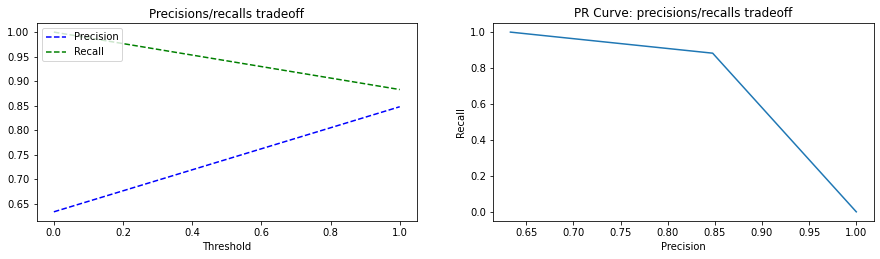

In [424]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_val, y_predxgb)

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

## ROC Curve

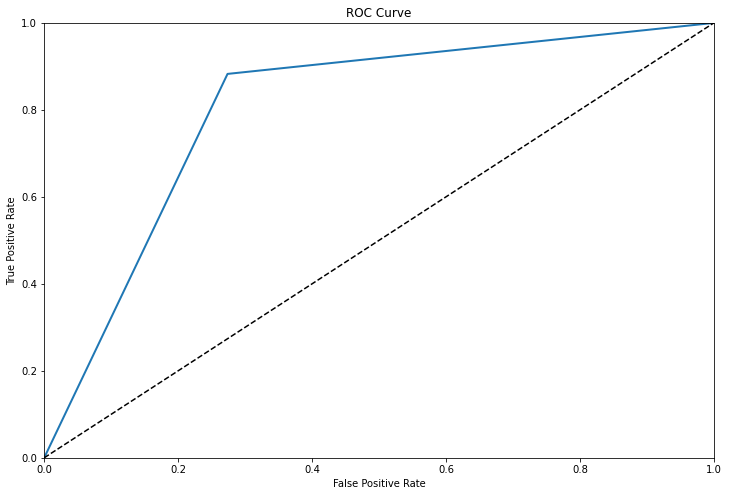

In [425]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_val, y_predxgb)
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [423]:
roc_auc_score(y_val, y_predxgb)

0.8044745484400657

In [357]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)

In [358]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
dtrain = xgb.DMatrix(x_train,y_train)
dtest  = xgb.DMatrix(x_val,y_val)

In [359]:
def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "gamma": trial.suggest_loguniform("gamma",0.05,1),
        "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
        "min_child_weight": trial.suggest_int("min_child_weight",5,11),
        "random_state": 2021
    }
    return(return_rmse(params)) 

In [360]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 20, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [361]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 300,show_progress_bar = True)

[I 2021-12-23 04:43:22,872] A new study created in memory with name: no-name-0da2b8e8-dccf-490f-88ac-333b51cc8ce7


  0%|          | 0/300 [00:00<?, ?it/s]

3.747126
[I 2021-12-23 04:43:23,023] Trial 0 finished with value: 3.747126 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.9, 'eta': 0.018697090099388154, 'gamma': 0.2958231631235295, 'max_depth': 7, 'min_child_weight': 7}. Best is trial 0 with value: 3.747126.
3.324202
[I 2021-12-23 04:43:23,055] Trial 1 finished with value: 3.324202 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.9, 'eta': 0.030296891468215185, 'gamma': 0.33211982323834305, 'max_depth': 5, 'min_child_weight': 11}. Best is trial 1 with value: 3.324202.
3.293329
[I 2021-12-23 04:43:23,073] Trial 2 finished with value: 3.293329 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.9, 'eta': 0.02974663066031598, 'gamma': 0.1133305079787216, 'max_depth': 5, 'min_child_weight': 9}. Best is trial 2 with value: 3.293329.
2.306714
[I 2021-12-23 04:43:23,110] Trial 3 finished with value: 2.306714 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.9, 'eta': 0.0705918258374493, 'gamma': 0.1919693492469

2.029135
[I 2021-12-23 04:43:24,709] Trial 32 finished with value: 2.029135 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0832325838693754, 'gamma': 0.8161051224418053, 'max_depth': 9, 'min_child_weight': 6}. Best is trial 14 with value: 1.920753.
1.873879
[I 2021-12-23 04:43:24,751] Trial 33 finished with value: 1.873879 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.9, 'eta': 0.09941766909198635, 'gamma': 0.8879553209978176, 'max_depth': 9, 'min_child_weight': 5}. Best is trial 33 with value: 1.873879.
2.113267
[I 2021-12-23 04:43:24,797] Trial 34 finished with value: 2.113267 and parameters: {'subsample': 0.9, 'colsample_bytree': 0.9, 'eta': 0.0768112675605779, 'gamma': 0.6551950485569299, 'max_depth': 9, 'min_child_weight': 5}. Best is trial 33 with value: 1.873879.
1.99755
[I 2021-12-23 04:43:24,841] Trial 35 finished with value: 1.99755 and parameters: {'subsample': 1.0, 'colsample_bytree': 1.0, 'eta': 0.0865894162729657, 'gamma': 0.37627870876559

2.037088
[I 2021-12-23 04:43:26,044] Trial 63 finished with value: 2.037088 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.7, 'eta': 0.08033407478866124, 'gamma': 0.5821956135584995, 'max_depth': 5, 'min_child_weight': 6}. Best is trial 33 with value: 1.873879.
1.918961
[I 2021-12-23 04:43:26,091] Trial 64 finished with value: 1.918961 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09516397981014724, 'gamma': 0.7061878266789071, 'max_depth': 5, 'min_child_weight': 6}. Best is trial 33 with value: 1.873879.
2.041258
[I 2021-12-23 04:43:26,144] Trial 65 finished with value: 2.041258 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.07344985872223314, 'gamma': 0.418857194131939, 'max_depth': 5, 'min_child_weight': 5}. Best is trial 33 with value: 1.873879.
2.015794
[I 2021-12-23 04:43:26,186] Trial 66 finished with value: 2.015794 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.7, 'eta': 0.09275744705540946, 'gamma': 0.6823570275

3.026398
[I 2021-12-23 04:43:27,464] Trial 95 finished with value: 3.026398 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.03360533767166852, 'gamma': 0.41579027798366225, 'max_depth': 5, 'min_child_weight': 7}. Best is trial 33 with value: 1.873879.
1.904642
[I 2021-12-23 04:43:27,494] Trial 96 finished with value: 1.904642 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09885919315215176, 'gamma': 0.5752506170680761, 'max_depth': 5, 'min_child_weight': 6}. Best is trial 33 with value: 1.873879.
1.837198
[I 2021-12-23 04:43:27,530] Trial 97 finished with value: 1.837198 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0992435241061745, 'gamma': 0.5538360518460004, 'max_depth': 5, 'min_child_weight': 5}. Best is trial 97 with value: 1.837198.
3.934049
[I 2021-12-23 04:43:27,594] Trial 98 finished with value: 3.934049 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.014248015336287006, 'gamma': 0.49324888

1.986915
[I 2021-12-23 04:43:29,023] Trial 126 finished with value: 1.986915 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.07848722131008062, 'gamma': 0.26763096535510195, 'max_depth': 5, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.931724
[I 2021-12-23 04:43:29,072] Trial 127 finished with value: 1.931724 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.08930231456439129, 'gamma': 0.05048046895033037, 'max_depth': 5, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.942241
[I 2021-12-23 04:43:29,137] Trial 128 finished with value: 1.942241 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.08371584101406986, 'gamma': 0.30096914821247783, 'max_depth': 5, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.918179
[I 2021-12-23 04:43:29,190] Trial 129 finished with value: 1.918179 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09499763554511556, 'gamma': 0

1.871882
[I 2021-12-23 04:43:30,400] Trial 155 finished with value: 1.871882 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09903657163988337, 'gamma': 0.30778569441409565, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.853239
[I 2021-12-23 04:43:30,443] Trial 156 finished with value: 1.853239 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09977844483922355, 'gamma': 0.30919273678132686, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.856164
[I 2021-12-23 04:43:30,486] Trial 157 finished with value: 1.856164 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09976441895927111, 'gamma': 0.2906498587736627, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.853051
[I 2021-12-23 04:43:30,531] Trial 158 finished with value: 1.853051 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0998193408103972, 'gamma': 0.3

1.90824
[I 2021-12-23 04:43:31,828] Trial 184 finished with value: 1.90824 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09469456531592157, 'gamma': 0.2881532935886838, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
2.772035
[I 2021-12-23 04:43:31,880] Trial 185 finished with value: 2.772035 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.041766607151683406, 'gamma': 0.33070393847807195, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.853278
[I 2021-12-23 04:43:31,921] Trial 186 finished with value: 1.853278 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09976984016867776, 'gamma': 0.3081216451382402, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.952976
[I 2021-12-23 04:43:31,968] Trial 187 finished with value: 1.952976 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09011498576385166, 'gamma': 0.26

1.852446
[I 2021-12-23 04:43:35,124] Trial 215 finished with value: 1.852446 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09949151813708695, 'gamma': 0.3026713644994782, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.978548
[I 2021-12-23 04:43:35,176] Trial 216 finished with value: 1.978548 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09261283877359672, 'gamma': 0.12743246778317951, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.915425
[I 2021-12-23 04:43:35,226] Trial 217 finished with value: 1.915425 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0996920570970967, 'gamma': 0.29116530486846803, 'max_depth': 11, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.984989
[I 2021-12-23 04:43:35,268] Trial 218 finished with value: 1.984989 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.08754167920003676, 'gamma': 0.

1.940542
[I 2021-12-23 04:43:36,717] Trial 248 finished with value: 1.940542 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09295254793975594, 'gamma': 0.2434489366368435, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.912501
[I 2021-12-23 04:43:36,774] Trial 249 finished with value: 1.912501 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09980627064950821, 'gamma': 0.22543288098077705, 'max_depth': 11, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.98065
[I 2021-12-23 04:43:36,814] Trial 250 finished with value: 1.98065 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0883706010337684, 'gamma': 0.2484476325455663, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.852452
[I 2021-12-23 04:43:36,855] Trial 251 finished with value: 1.852452 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.0999220923097627, 'gamma': 0.2849

3.547233
[I 2021-12-23 04:43:38,404] Trial 279 finished with value: 3.547233 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.02202386352795879, 'gamma': 0.2336412188370188, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
2.026409
[I 2021-12-23 04:43:38,453] Trial 280 finished with value: 2.026409 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09961122745171509, 'gamma': 0.20871615313779193, 'max_depth': 7, 'min_child_weight': 10}. Best is trial 111 with value: 1.834918.
1.85495
[I 2021-12-23 04:43:38,498] Trial 281 finished with value: 1.85495 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09981411001848958, 'gamma': 0.16645562423966953, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 111 with value: 1.834918.
1.984559
[I 2021-12-23 04:43:38,547] Trial 282 finished with value: 1.984559 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'eta': 0.09277437252291708, 'gamma': 0.5

In [362]:
from sklearn.metrics import mean_absolute_error
xgb_model = xgb.XGBRegressor(**(study1.best_params))

%time xgb_model.fit(x_train, y_train, early_stopping_rounds=7, eval_set=[(x_val, y_val)], verbose=False)

y_pred_xgb = xgb_model.predict(x_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print("MAE: ", mae_xgb)

CPU times: user 429 ms, sys: 116 ms, total: 545 ms
Wall time: 117 ms
MAE:  0.6986617667185687
